In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from functions import gaussian, euclidean_distance, gaussian_second_derivative
from network import Network

os.chdir('..')

In [2]:
def cluster(kohonen_network, data):
    classes = list(data['c'].unique())
    colnames = copy.deepcopy(classes)
    colnames.append('x')
    colnames.append('y')
    clusters = pd.DataFrame(columns=colnames)

    shape = kohonen_network.shape
    for i in range(shape[0]):
        for j in range(shape[1]):
            row = {'x': i, 'y': j}
            for c in classes:
                row[c] = 0
            row = pd.DataFrame(row, index=[0])
            clusters = pd.concat([clusters, row], ignore_index=True, axis=0)
    for i in range(len(data)):
        x = np.array(data.iloc[i, :2])
        x_class = data.loc[i, 'c']
        i_min, j_min = kohonen_network._find_BMU(x)
        clusters.loc[(clusters['x'] == i_min ) & (clusters['y'] == j_min), x_class] += 1
    return clusters

def visualise_2D(clusters):
    n = len(clusters.columns) - 2
    plt.figure(figsize=[8, 8])
    colors = ['yellow', 'orange', 'red', 'purple', 'blue', 'green']
    for i in range(n):
        plt.scatter(x=clusters.x, y=clusters.y, alpha=0.4, s=100*clusters[i].astype('float'), c=colors[i])
    #plt.legend(np.arange(n))
    plt.show()


In [4]:
hexagon_data = pd.read_csv('data\\hexagon.csv')
x = np.array(hexagon_data.x)
y = np.array(hexagon_data.y)
x = np.reshape(x, (-1, 1))
y = np.reshape(y, (-1, 1))
hex_xy = np.concatenate((x, y), axis=1)
c = np.array(hexagon_data.c)

In [5]:
KN_hex = Network(input_shape=2, shape=(10, 16))
KN_hex.fit(hex_xy, 200, neighbourhood_scale=0.6)

Epoch no. 0
Epoch no. 1
Epoch no. 2
Epoch no. 3
Epoch no. 4
Epoch no. 5
Epoch no. 6
Epoch no. 7
Epoch no. 8
Epoch no. 9
Epoch no. 10
Epoch no. 11
Epoch no. 12
Epoch no. 13
Epoch no. 14
Epoch no. 15
Epoch no. 16
Epoch no. 17
Epoch no. 18
Epoch no. 19
Epoch no. 20
Epoch no. 21
Epoch no. 22
Epoch no. 23
Epoch no. 24
Epoch no. 25
Epoch no. 26
Epoch no. 27
Epoch no. 28
Epoch no. 29
Epoch no. 30
Epoch no. 31
Epoch no. 32
Epoch no. 33
Epoch no. 34
Epoch no. 35
Epoch no. 36
Epoch no. 37
Epoch no. 38
Epoch no. 39
Epoch no. 40
Epoch no. 41
Epoch no. 42
Epoch no. 43
Epoch no. 44
Epoch no. 45
Epoch no. 46
Epoch no. 47
Epoch no. 48
Epoch no. 49
Epoch no. 50
Epoch no. 51
Epoch no. 52
Epoch no. 53
Epoch no. 54
Epoch no. 55
Epoch no. 56
Epoch no. 57
Epoch no. 58
Epoch no. 59
Epoch no. 60
Epoch no. 61
Epoch no. 62
Epoch no. 63
Epoch no. 64
Epoch no. 65
Epoch no. 66
Epoch no. 67
Epoch no. 68
Epoch no. 69
Epoch no. 70
Epoch no. 71
Epoch no. 72
Epoch no. 73
Epoch no. 74
Epoch no. 75
Epoch no. 76
Epoch no.

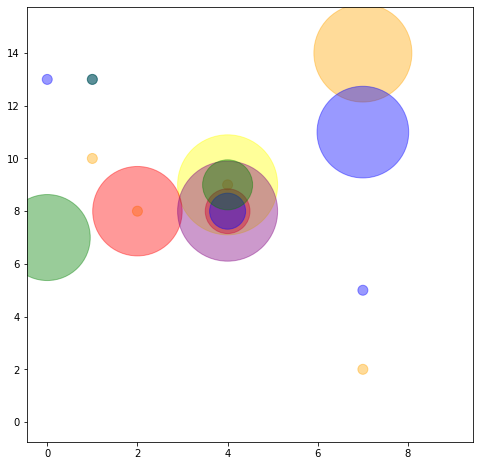

In [6]:
KN_hex_clusters = cluster(KN_hex, hexagon_data)
visualise_2D(KN_hex_clusters)

In [7]:
KN_hex.weights

array([[[-0.75987201, -0.72956592],
        [-0.76635152, -0.65846853],
        [-0.75893688, -0.6626522 ],
        [ 0.28359033,  0.98114921],
        [-0.75047799, -0.72872699],
        [-0.76665845, -0.66211378],
        [-0.76865898, -0.71536611],
        [-1.51216829,  1.64012903],
        [-0.76305354, -0.69194934],
        [ 0.25989094,  0.9853765 ],
        [ 1.13335998,  0.58928384],
        [ 1.13638683,  0.59371991],
        [ 0.27644733,  0.98315379],
        [-0.08370352, -1.18093199],
        [-0.75572118, -0.72805133],
        [-0.76778177, -0.67755788]],

       [[-0.75422424, -0.72472297],
        [-0.7817608 , -0.67944732],
        [-0.81343812, -0.64787219],
        [-0.76841992, -0.71451808],
        [-0.77067912, -0.6770101 ],
        [-0.77650218, -0.67955174],
        [-0.77499316, -0.69064103],
        [ 0.28614309,  0.98177748],
        [ 0.30229338,  0.98101555],
        [ 0.25890241,  0.9854049 ],
        [ 0.42500312,  0.97989381],
        [ 0.25322924,  0.9

In [8]:
KN_hex = Network(input_shape=2, shape=(10, 16))
KN_hex.fit(hex_xy, 200, neighbourhood_scale=1)

Epoch no. 0
Epoch no. 1
Epoch no. 2
Epoch no. 3
Epoch no. 4
Epoch no. 5
Epoch no. 6
Epoch no. 7
Epoch no. 8
Epoch no. 9
Epoch no. 10
Epoch no. 11
Epoch no. 12
Epoch no. 13
Epoch no. 14
Epoch no. 15
Epoch no. 16
Epoch no. 17
Epoch no. 18
Epoch no. 19
Epoch no. 20
Epoch no. 21
Epoch no. 22
Epoch no. 23
Epoch no. 24
Epoch no. 25
Epoch no. 26
Epoch no. 27
Epoch no. 28
Epoch no. 29
Epoch no. 30
Epoch no. 31
Epoch no. 32
Epoch no. 33
Epoch no. 34
Epoch no. 35
Epoch no. 36
Epoch no. 37
Epoch no. 38
Epoch no. 39
Epoch no. 40
Epoch no. 41
Epoch no. 42
Epoch no. 43
Epoch no. 44
Epoch no. 45
Epoch no. 46
Epoch no. 47
Epoch no. 48
Epoch no. 49
Epoch no. 50
Epoch no. 51
Epoch no. 52
Epoch no. 53
Epoch no. 54
Epoch no. 55
Epoch no. 56
Epoch no. 57
Epoch no. 58
Epoch no. 59
Epoch no. 60
Epoch no. 61
Epoch no. 62
Epoch no. 63
Epoch no. 64
Epoch no. 65
Epoch no. 66
Epoch no. 67
Epoch no. 68
Epoch no. 69
Epoch no. 70
Epoch no. 71
Epoch no. 72
Epoch no. 73
Epoch no. 74
Epoch no. 75
Epoch no. 76
Epoch no.